# HealtNotebook 



Welcome to HeathNotebook! <br> This is a notebook for health data analysis.
First we will ask you to enter your name and age and then we will ask more about your current health.
Depending on where you are running this notebook, when you run the next cell, you will be prompted to write your name and age.

In [1]:
import sys
sys.path.append('./modules')

import questionnaire_module

In [2]:
userdata =({
    'Name': 'Heidi',
    'Age': 28,
    'Sleeptime (h)': 7.0,
    'Latency': 10,
    'Restfulness': 2,
    'Wakes': 0,
    'Stress': 7,
    'Steps': 10000,
    'Food': 3,
    'Exercise scale': 3
})


In [ ]:
userdata

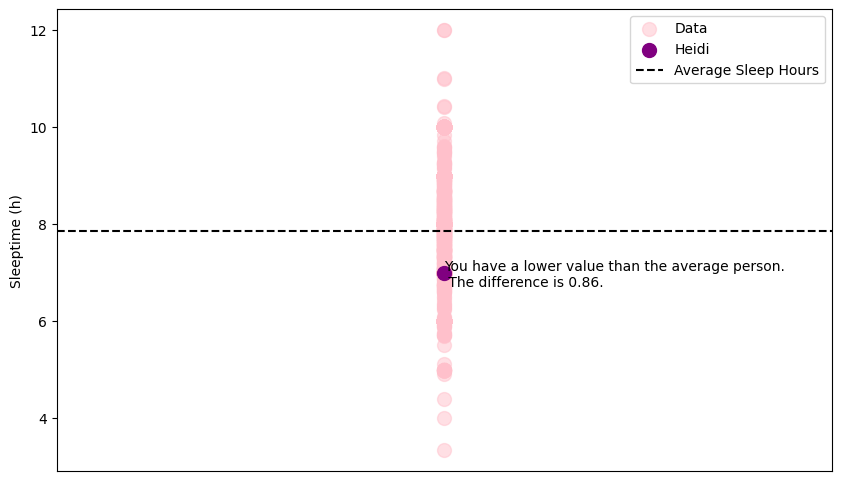

In [3]:
# function to plot the user data and the data 
import data_module
df = data_module.get_data()

# plot using the data_module plot function 
data_module.plot(dataset = df,
                 userdata= userdata,
                 plotted_variables = ['Sleeptime (h)'])  

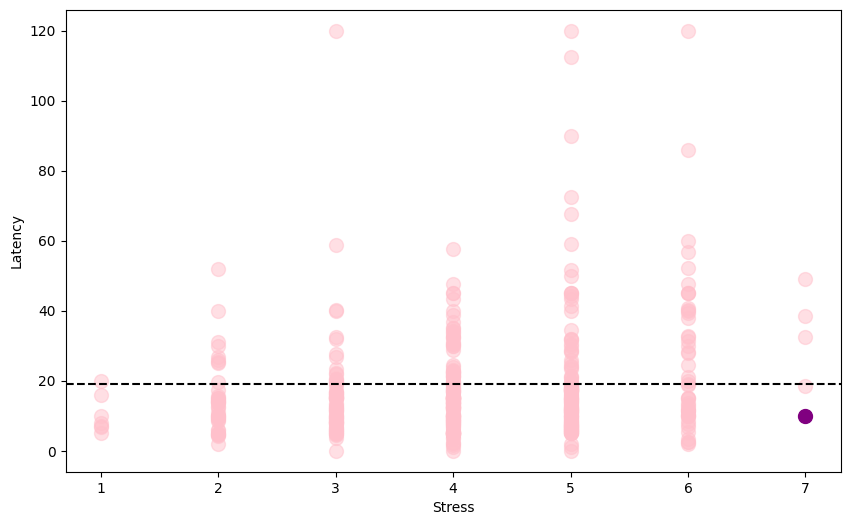

In [4]:
# steps and latency scatter plot
# plot using the data_module plot function 
data_module.plot(dataset = df,
                 userdata= userdata,
                 plotted_variables = ['Stress', 'Latency']) 

In [ ]:
# steps and latency scatter plot
plt.figure(figsize=(10, 6))

x_values = data['Steps']
y_values = data['Latency']

plt.scatter(x_values, y_values, color='pink', marker='o', s=100, alpha=0.5, label='Data')
plt.scatter([daily_steps_value], [latency], color='purple', marker='o', s=100, label=name_value)


plt.ylabel('Latency in minutes')
plt.xlabel('Steps')
#plt.title('User Sleep Hours vs Data')
# print average latency as dotted line
plt.axhline(y=data['Latency'].mean(), color='black', linestyle='--', label='Average Latency')



plt.legend()
plt.show()


In [ ]:
# Sleep time and Stress 
plt.figure(figsize=(10, 6))

y_values = data['Sleeptime (h)']
x_values = data['Stress']
plt.scatter(x_values, y_values, color='pink', marker='o', s=100, alpha=0.5, label='Data')
plt.scatter([hours_slept_value], [stress_value], color='purple', marker='o', s=100, label=name_value)

plt.show()


In [ ]:
# 1. sctter steps latency

food healthiness ja restfullness 

plt.figure(figsize=(10, 6))

y_values = data['Restfulness']
x_values = data['Food Healthiness']
plt.scatter(x_values, y_values, color='pink', marker='o', s=100, alpha=0.5, label='Data')
plt.scatter([food_value], [], color='purple', marker='o', s=100, label=name_value)

plt.show()

Load pre-trained models with Pickle and make predictions based on input by the user.

In [ ]:
with open('./data/models/model_sleeptime.pkl', 'rb') as f:
    model_sleeptime = pickle.load(f)

with open('./data/models/model_latency.pkl', 'rb') as f:
    model_latency = pickle.load(f)

# This model takes as inputs the step count, stress level and exercise
# These values would be given by the user
steps = 7000
stress_level = 3
exercise = 0

# Predict sleep time and latecy for the user
x = np.array([steps, stress_level, exercise])
pred_sleep = model_sleeptime.predict(x.reshape(-1 ,3))
pred_latency = model_latency.predict(x.reshape(-1, 3))
print("Predicted sleeptime", round(pred_sleep[0], 2), "(h) and predicted latency", round(pred_latency[0], 2), "(min).")

# Make another prediction with decreased stress and added exercise
# (higher stress level actually means lower stress)
x = np.array([steps, stress_level + 2, 1])
pred_sleep_alt = model_sleeptime.predict(x.reshape(-1 ,3))
pred_latency_alt = model_latency.predict(x.reshape(-1, 3))
diff_sleep = (pred_sleep_alt[0] - pred_sleep[0]) * 60
diff_latency = pred_latency[0] - pred_sleep_alt[0]
print("By moderately decresing your stress level and adding exericse to your routine you can change your sleep:")
print("Increase sleep time by", round(diff_sleep, 1), "minutes.")
print("Decrease sleep latency by", round(diff_latency, 1), "minutes.")


In [ ]:
import json

def find_imports_in_notebook(notebook_path):
    with open(notebook_path, 'r') as f:
        notebook = json.load(f)

    imports = set()

    for cell in notebook['cells']:
        if cell['cell_type'] == 'code':
            for line in cell['source']:
                if line.startswith('import') or line.startswith('from'):
                    imports.add(line.strip())

    return imports

notebook_path = '../DataScienceProject/HealthNotebook.ipynb'  # Replace this with the path to your notebook
imports = find_imports_in_notebook(notebook_path)
print("Packages imported:")
for i in imports:
    print(i)
